# Lab 3: ATLAS Data Analysis 
#### Physics 265
#### Emmalynn Malixi

## Introduction

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit
from scipy import stats

### Constant Mass Values and Their Errors

In [2]:
mZ0=91.1880 #GeV/c^2
mZ0_err=0.0020 #GeV/c^2
mW=80.3692 #GeV/c^2
mW_err=0.0133 #GeV/c^2
mH=125.20 #GeV/c^2
mH_err=0.11 #GeV/c^2
me=0.51099895000 #MeV/c^2
me_err=0.00000000015 #MeV/c^2
mm=105.6583755 #MeV/c^2
mm_err=0.0000023 #MeV/c^2
mT=1776.93 #MeV/c^2
mT_err=0.09 #MeV/c^2

## Part 1: The Invariant Mass Distribution

### Question 1.1

In [3]:
data=np.loadtxt('Downloads/Python/hw1-MalixiEmmalynn/atlas_z_to_ll.csv',delimiter=',', skiprows=1)
#print(data)

### Question 1.2

In [4]:
pt1=data[:,0]
pt2=data[:,1]
eta1=data[:,2]
eta2=data[:,3]
phi1=data[:,4]
phi2=data[:,5]
E1=data[:,6]
E2=data[:,7]

#lepton 1
px1=pt1*np.cos(phi1)
py1=pt1*np.sin(phi1)
pz1=pt1*np.sinh(eta1)

#lepton 2
px2=pt2*np.cos(phi2)
py2=pt2*np.sin(phi2)
pz2=pt2*np.sinh(eta2)

#totals
pxtot=px1+px2
pytot=py1+py2
pztot=pz1+pz2
Etot=E1+E2

#mass
M=np.sqrt(Etot**2-(pxtot**2+pytot**2+pztot**2))

### Question 1.3

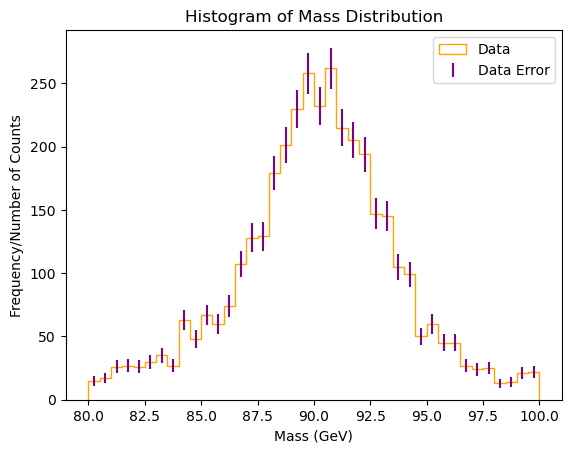

In [5]:
bins=np.linspace(80,100,41)
fig,ax=plt.subplots()
data=ax.hist(M,bins,histtype='step',color='orange',label='Data')
N=data[0]
err=np.sqrt(N)
bin_num=data[1]
bin_centers=np.zeros(40)
for i in range(40):
    bin_centers[i]=(bin_num[i]+bin_num[i+1])/2

ax.errorbar(bin_centers,N,yerr=err,color='purple',ls='',label='Data Error')

ax.set_xlabel('Mass (GeV)')
ax.set_ylabel('Frequency/Number of Counts')
ax.set_title('Histogram of Mass Distribution')
ax.legend()

This histogram depicts the frequency as a function of the mass.

## Part 2: Breit-Wigner Fit

### Question 2.1

In [6]:
def D(m,m0,G):
    num=G/2
    den=np.pi*((m-m0)**2+(G/2)**2)
    return num/den

### Question 2.2

In [7]:
mask=(bin_centers>87)&(bin_centers<93)
bin_fit=bin_centers[mask]
N_fit=N[mask]
err_fit=err[mask]

def D2(m,m0,G):
    return 5000/2*D(m,m0,G)

#initial guess
p0=[90,2.5]

p_opt,pcov=curve_fit(f=D2,xdata=bin_fit,ydata=N_fit,sigma=err_fit,absolute_sigma=True,p0=p0)

### Question 2.3

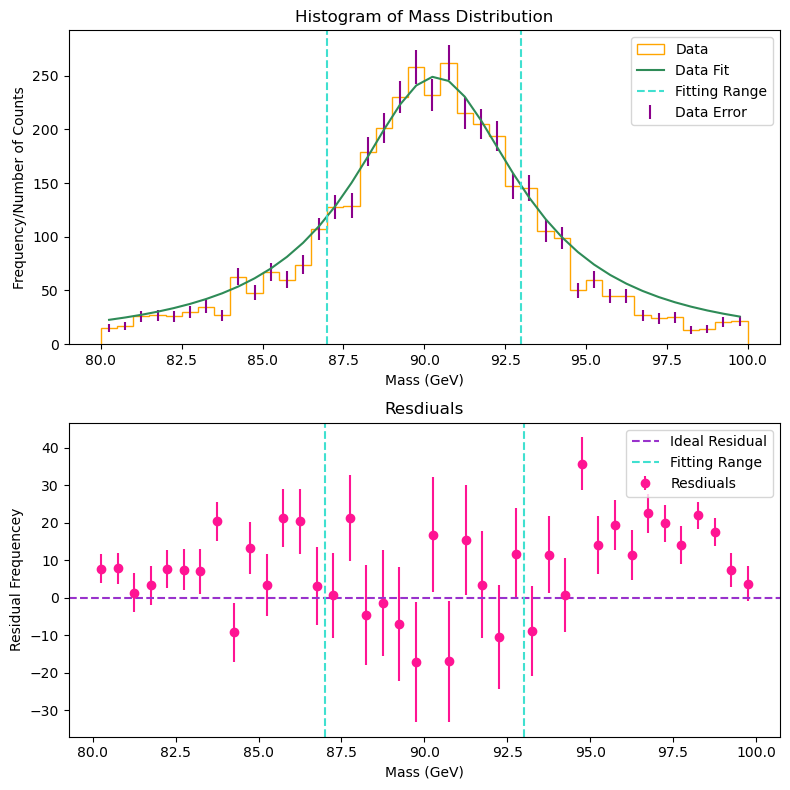

In [8]:
m0_fit=p_opt[0]
m0_err=np.sqrt(pcov[0,0])
G_fit=p_opt[1]
G_err=np.sqrt(pcov[1,1])
D_fit=D2(bin_centers,m0_fit,G_fit)

fig,ax=plt.subplots(2,1,figsize=(8,8))
#from before

ax[0].hist(M,bins,histtype='step',color='orange',label='Data')
ax[0].errorbar(bin_centers,N,yerr=err,color='darkmagenta',ls='',label='Data Error')
ax[0].plot(bin_centers,D_fit,label='Data Fit',color='seagreen')

ax[0].set_xlabel('Mass (GeV)')
ax[0].set_ylabel('Frequency/Number of Counts')
ax[0].set_title('Histogram of Mass Distribution')

ax[0].axvline(x=87,color='turquoise',ls='--',label='Fitting Range')
ax[0].axvline(x=93,color='turquoise',ls='--')

ax[0].legend()

residual=D_fit-N
residual_err=err
ax[1].errorbar(bin_centers,residual,residual_err,ls='',marker='o',label='Resdiuals',color='deeppink')
ax[1].axhline(0,ls='--',color='darkorchid',label='Ideal Residual')
ax[1].axvline(x=87,color='turquoise',ls='--',label='Fitting Range')
ax[1].axvline(x=93,color='turquoise',ls='--')
ax[1].set_xlabel('Mass (GeV)')
ax[1].set_ylabel('Residual Frequencey')
ax[1].set_title('Resdiuals')

ax[1].legend()

fig.tight_layout()

Histogram and Residuals Plot- The first figure depicts the histogram plot of the frequency and its errors when measuring the mass of the ATLAS detector, as well as the fit. The second figure is the residual plot, depicting between the fit and the data, again including error as well.

### Question 2.4

In [9]:
D_range_fit=D2(bin_fit,p_opt[0],p_opt[1])
chisq=np.sum(((N_fit-D_range_fit)/err_fit)**2)
#print(chisq)

deg_fre=len(N_fit)-len(p_opt)
#print(deg_fre)
chisq_red=chisq/deg_fre
#print(chisq_red)

from scipy.stats import chi2
p=chi2.sf(chisq,deg_fre)
#print(p)

print(f'Inside the fitting range, the chi-squre value is {chisq}. There are {deg_fre} degrees of freedom, and the reduced chi-square is {chisq_red}, and the p value is {p}.')

Inside the fitting range, the chi-squre value is 9.985097164367133. There are 10 degrees of freedom, and the reduced chi-square is 0.9985097164367133, and the p value is 0.44180173855364147.


### Question 2.5

In [10]:
print(f'The best fit for mass m0 is {m0_fit} +- {m0_err} GeV.')

The best fit for mass m0 is 90.34080544225151 +- 0.09351295788437641 GeV.


### Question 

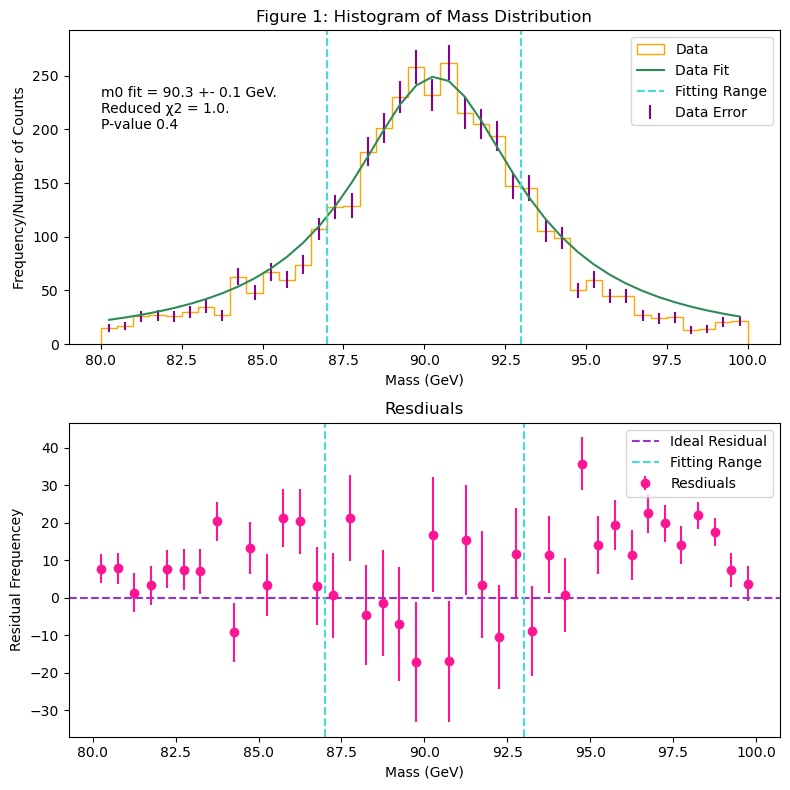

In [11]:
fig,ax=plt.subplots(2,1,figsize=(8,8))
#from before

ax[0].hist(M,bins,histtype='step',color='orange',label='Data')
ax[0].errorbar(bin_centers,N,yerr=err,color='darkmagenta',ls='',label='Data Error')
ax[0].plot(bin_centers,D_fit,label='Data Fit',color='seagreen')

ax[0].set_xlabel('Mass (GeV)')
ax[0].set_ylabel('Frequency/Number of Counts')
ax[0].set_title('Figure 1: Histogram of Mass Distribution')

ax[0].axvline(x=87,color='turquoise',ls='--',label='Fitting Range')
ax[0].axvline(x=93,color='turquoise',ls='--')

ax[0].legend()
ax[0].text(s=f'm0 fit = {m0_fit:.1f} +- {m0_err:.1f} GeV.\nReduced χ2 = {chisq_red:.1f}.\nP-value {p:.1f}',x=80,y=200)

residual=D_fit-N
residual_err=err
ax[1].errorbar(bin_centers,residual,residual_err,ls='',marker='o',label='Resdiuals',color='deeppink')
ax[1].axhline(0,ls='--',color='darkorchid',label='Ideal Residual')
ax[1].axvline(x=87,color='turquoise',ls='--',label='Fitting Range')
ax[1].axvline(x=93,color='turquoise',ls='--')
ax[1].set_xlabel('Mass (GeV)')
ax[1].set_ylabel('Residual Frequencey')
ax[1].set_title('Resdiuals')

ax[1].legend()

fig.tight_layout()

Figure 1: The first figure depicts the histogram plot of the frequency and its errors of mass of the ATLAS detector, as well as the fit. It also includes a second figure which is the residual plot, depicting between the fit and the data, again including error as well.

## Part 3: 2D Parameter Contours

### Question 3.1

In [12]:
bins=300
Z0_range=np.linspace(89,91,bins)
G_range=np.linspace(5,8,bins)
GZmeshgrid=np.meshgrid(Z0_range,G_range)

chisqgrid=np.zeros((len(Z0_range),len(G_range)))

for i in range(len(Z0_range)):
    Z0=Z0_range[i]
    for j in range(len(G_range)):
        G=G_range[j]
        GZfit=D2(bin_fit,Z0,G)
        chisq2=np.sum(((N_fit-GZfit)/err_fit)**2)
        chisqgrid[j,i]=chisq2

### Question 3.2

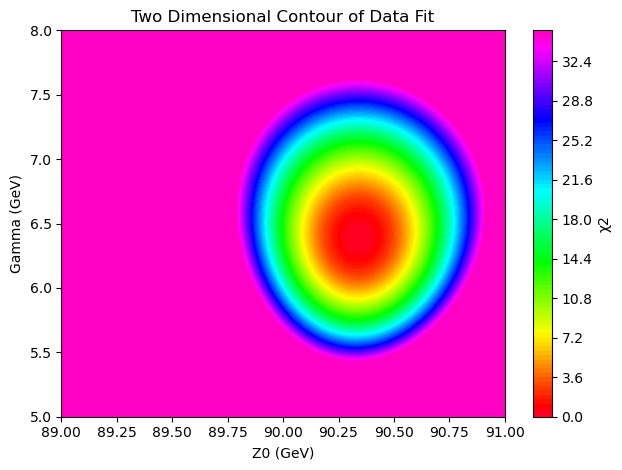

In [13]:
X,Y=GZmeshgrid
delta_chisq=chisqgrid-np.min(chisqgrid)
delta_chisq_clip=np.clip(delta_chisq,0,35)

fig,ax=plt.subplots()
cbar=ax.contourf(X,Y,delta_chisq_clip,levels=100,cmap='gist_rainbow')
fig.colorbar(cbar,ax=ax,label='χ2')
ax.set_xlabel('Z0 (GeV)')
ax.set_ylabel('Gamma (GeV)')
ax.set_title('Two Dimensional Contour of Data Fit')
fig.tight_layout()

### Question 3.3

<a list of 2 text.Text objects>

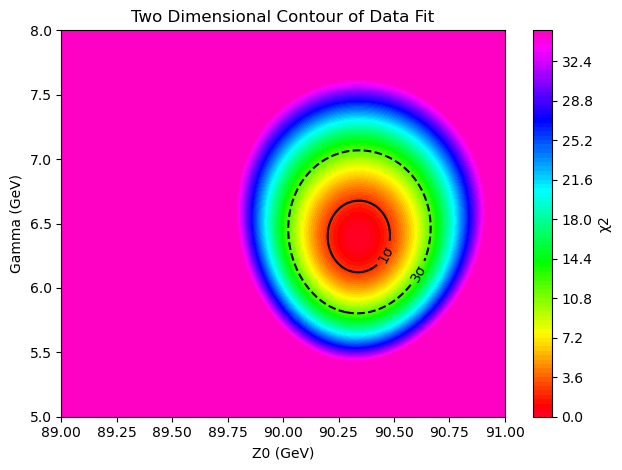

In [14]:
fig,ax=plt.subplots()
cbar=ax.contourf(X,Y,delta_chisq_clip,levels=100,cmap='gist_rainbow')
fig.colorbar(cbar,ax=ax,label='χ2')
ax.set_xlabel('Z0 (GeV)')
ax.set_ylabel('Gamma (GeV)')
ax.set_title('Two Dimensional Contour of Data Fit')
fig.tight_layout()

chisq_sig1=2.30
chisq_sig3=11.83
cont_lines=ax.contour(Z0_range,G_range,delta_chisq,levels=[chisq_sig1,chisq_sig3],colors=['black','black'],linestyles=['-','--'])
ax.clabel(cont_lines,fmt={chisq_sig1:'1σ',chisq_sig3:'3σ'})

### Question 3.4

Text(90.38080544225151, 6.390996756344532, 'Fit')

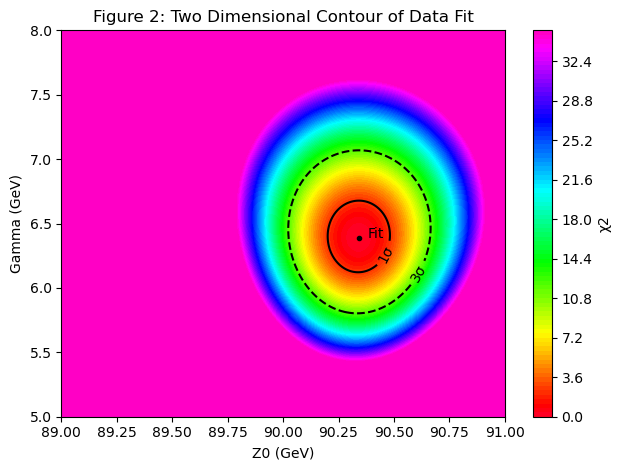

In [15]:
fig,ax=plt.subplots()
cbar=ax.contourf(X,Y,delta_chisq_clip,levels=100,cmap='gist_rainbow')
fig.colorbar(cbar,ax=ax,label='χ2')
ax.set_xlabel('Z0 (GeV)')
ax.set_ylabel('Gamma (GeV)')
ax.set_title('Figure 2: Two Dimensional Contour of Data Fit')
fig.tight_layout()

chisq_sig1=2.30
chisq_sig3=11.83
cont_lines=ax.contour(Z0_range,G_range,delta_chisq,levels=[chisq_sig1,chisq_sig3],colors=['black','black'],linestyles=['-','--'])
ax.clabel(cont_lines,fmt={chisq_sig1:'1σ',chisq_sig3:'3σ'})

ax.plot(m0_fit,G_fit,color='black',marker='.')
ax.text(m0_fit+.04,G_fit,'Fit',color='black')

Figure 2- This figure is the the χ2 contour plot. It indicates the varying values of Z0 and Gamma, and depicts the ideal area of values for each of the parameters, in order to best fit the data. 